In [175]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [176]:
# upload data

processor= pd.read_json(r"Scrape-Processors\product_output_processor.json")

In [177]:
# First check on data structure - data is nested

processor.head()

,name,product_tech_spec,other_tech_spec,product_addl_info,seller,seller_link,freq_bought,freq_bought_link,link_to_all_reviews
0,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...","[{'info': 'Brand', 'value': 'AMD'}, {'info': '...",None,"[{'info': 'Customer Reviews', 'value': '/* * F...",None,None,Corsair Vengeance LPX 16GB (2x8GB) DDR4 DRAM 3...,/Corsair-Vengeance-3200MHz-Desktop-Memory/dp/B...,/AMD-Ryzen-3600-12-Thread-Processor/product-re...
1,AMD Ryzen 5 2600 Processor with Wraith Stealth...,"[{'info': 'Wireless Type', 'value': '802.11a'}]","[{'info': 'Brand', 'value': 'AMD'}, {'info': '...","[{'info': 'Customer Reviews', 'value': '/* * F...",None,None,None,None,/AMD-Processor-Wraith-Stealth-Cooler/product-r...
2,Intel Core i9-9900K Desktop Processor 8 Cores ...,"[{'info': 'Brand', 'value': 'Intel'}, {'info':...",None,"[{'info': 'Customer Reviews', 'value': '/* * F...",DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...,ARCTIC MX-4 - Thermal Compound Paste For Coole...,https://www.amazon.com/ARCTIC-MX-4-Compound-Mi...,/Intel-i9-9900K-Processor-Unlocked-BX806849900...
3,Intel Core i7-9700K Desktop Processor 8 Cores ...,"[{'info': 'Memory Speed', 'value': '3600 MHz'}...","[{'info': 'Brand', 'value': 'Intel'}, {'info':...","[{'info': 'Customer Reviews', 'value': '/* * F...",None,None,Asus Prime Z390-A Motherboard LGA1151 (Intel 8...,/Prime-Z390-Motherboard-LGA1151-Gigabit/dp/B07...,/Intel-i7-9700K-Desktop-Processor-Unlocked/pro...
4,Industrial Rugged Fanless Silent Mini PC Compu...,"[{'info': 'Max Screen Resolution', 'value': '3...","[{'info': 'Series', 'value': 'LITESHIELD 2.0'}...","[{'info': 'ASIN', 'value': 'B08BKRZB4Z'}, {'in...",Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...,None,None,/Industrial-Fanless-Computer-Threads-i5-8500T/...


In [178]:
processor.product_tech_spec[0][0]["info"]

'Brand'

In [179]:
processor.shape

(5894, 9)

In [180]:
processor.isnull().sum()

name                      5
product_tech_spec      2402
other_tech_spec        3327
product_addl_info       121
seller                 1643
seller_link            1643
freq_bought            4064
freq_bought_link       4064
link_to_all_reviews    1048
dtype: int64

In [181]:
# drop values with no name

processor.dropna(subset=["name"],inplace=True)

In [182]:
# some values are repeated over and over (sponsored items on amazon.com) - preparing a small df for visualization of this values

repeat = processor.name
repeat = repeat.value_counts().to_frame()
repeat.reset_index(inplace=True)
repeat.columns=["Product_Name","Value"]
top_repeated= repeat.head(10)
top_repeated

,Product_Name,Value
0,"GIM MB8 ATX Case, Mid-Tower PC Gaming Chassis,...",389
1,"Noctua NF-P12 redux-1700 PWM, High Performance...",227
2,Omnihil 8 Feet AC Power Cord Compatible with A...,214
3,Industrial Rugged Fanless Silent Mini PC Compu...,115
4,"Cooler Master MasterLiquid ML120L RGB V2, Clos...",83
5,Industrial Rugged Fanless Silent Mini PC Compu...,76
6,MSI GeForce GT 730 Kepler GDDR5 2GB OC Low Pro...,5
7,"Noctua NF-P14s redux-1500 PWM, High Performanc...",4
8,"Mini PC,Intel Celeron J3455 Windows 10 Pro Min...",4
9,Esp-01 WiFi Module New Version ESP8266 NodeMCU...,4


In [183]:
top_repeated.dtypes

Product_Name    object
Value            int64
dtype: object

<AxesSubplot:>

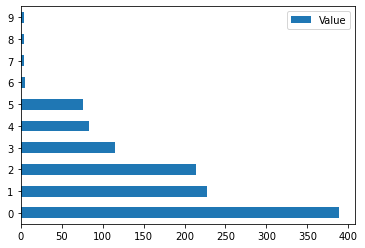

In [184]:
top_repeated.plot(kind="barh")

In [185]:
list(top_repeated.Product_Name)

['GIM MB8 ATX Case, Mid-Tower PC Gaming Chassis, Compact Computer Case with Tempered Glass Panel, 4 RGB Fans Pre-Installed, Water-Cooling Ready, Cable Management System - Black',
 'Noctua NF-P12 redux-1700 PWM, High Performance Cooling Fan, 4-Pin, 1700 RPM (120mm, Grey)',
 'Omnihil 8 Feet AC Power Cord Compatible with ASUS G11DF-DBR5-GTX1060 Desktop PC, AMD Ryzen 5 Processor, GTX 1060 - White',
 'Industrial Rugged Fanless Silent Mini PC Computer, Intel i5, Intel i7, Intel i9, Up to 8 Cores/16 Threads, Up to 1TB SSD, 32GB RAM, Wi-Fi, 4K, Windows 10 (Intel i5-8500T CPU + 240GB SSD + 8GB RAM)',
 'Cooler Master MasterLiquid ML120L RGB V2, Close-Loop AIO CPU Liquid Cooler, 120 Radiator, SickleFlow 120mm, RGB Lighting, 3rd Gen Dual Chamber Pump for AMD Ryzen/Intel LGA1200/1151',
 'Industrial Rugged Fanless Silent Mini PC Computer, Intel i5, Intel i7, Intel i9, Up to 8 Cores/16 Threads, Up to 1TB SSD, 32GB RAM, Wi-Fi, 4K, Windows 10 (Intel i7-8700T CPU + 500GB SSD + 16GB RAM)',
 'MSI GeForce 

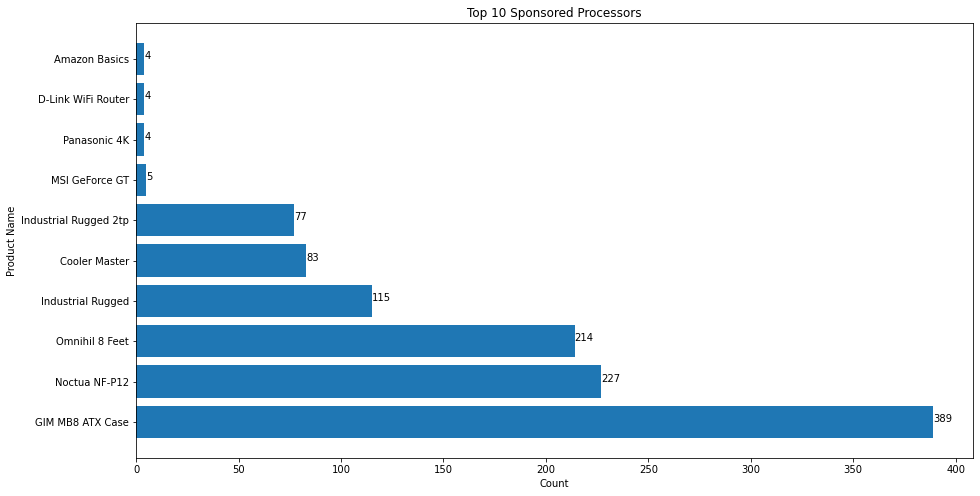

In [187]:
# Top 10 Sponsored Processors

x=['GIM MB8 ATX Case', 'Noctua NF-P12', 'Omnihil 8 Feet',
 'Industrial Rugged',
 'Cooler Master',
 'Industrial Rugged 2tp',
 'MSI GeForce GT',
 'Panasonic 4K',
 'D-Link WiFi Router',
 'Amazon Basics']
y=[389, 227, 214, 115, 83, 77, 5, 4, 4, 4]
plt.figure(figsize=(15,8))
fig= plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.ylabel('Product Name')
plt.xlabel('Count')
plt.title('Top 10 Sponsored Processors')
plt.savefig("Top 10 Sponsored Processors.png", dpi=80)


In [188]:
# Drop of columns I won't take into account
# reset_index(drop=True) drops the current index of the DataFrame and replaces it with an index of increasing integers.

processor.drop(columns=["freq_bought","freq_bought_link"],inplace=True)
processor=processor.reset_index(drop=True)

In [189]:
## Extracting data from nests

# At index 0 column product_tech_spec, a processor looks like this. How to extract the data from such a nest? 

processor.product_tech_spec[0]

[{'info': 'Brand', 'value': 'AMD'},
 {'info': 'Series', 'value': 'Ryzen 5'},
 {'info': 'Item model number', 'value': 'Ryzen 5 3600'},
 {'info': 'Item Weight', 'value': '1.6 ounces'},
 {'info': 'Product Dimensions', 'value': '1.57 x 1.57 x 0.24 inches'},
 {'info': 'Item Dimensions  LxWxH', 'value': '1.57 x 1.57 x 0.24 inches'},
 {'info': 'Processor Brand', 'value': 'AMD'},
 {'info': 'Processor Count', 'value': '6'},
 {'info': 'Manufacturer', 'value': 'AMD'},
 {'info': 'ASIN', 'value': 'B07STGGQ18'},
 {'info': 'Is Discontinued By Manufacturer', 'value': 'No'},
 {'info': 'Date First Available', 'value': 'July 1, 2019'}]

In [190]:
processor.product_tech_spec[0][0]

{'info': 'Brand', 'value': 'AMD'}

In [191]:
processor.product_tech_spec[0][0]["info"]

'Brand'

In [192]:
# shows no results cause the value is Nan

processor.iloc[0]["other_tech_spec"]

In [193]:
# just another way to access the data in the "cells"

processor.iloc[1]["other_tech_spec"]

[{'info': 'Brand', 'value': 'AMD'},
 {'info': 'Item model number', 'value': 'YD2600BBAFBOX'},
 {'info': 'Item Weight', 'value': '1 pounds'},
 {'info': 'Product Dimensions', 'value': '1.6 x 1.6 x 0.3 inches'},
 {'info': 'Item Dimensions  LxWxH', 'value': '1.6 x 1.6 x 0.3 inches'},
 {'info': 'Processor Brand', 'value': 'AMD'},
 {'info': 'Processor Count', 'value': '6'},
 {'info': 'Computer Memory Type', 'value': 'DDR4 SDRAM'},
 {'info': 'Manufacturer', 'value': 'AMD'},
 {'info': 'ASIN', 'value': 'B07B41WS48'},
 {'info': 'Is Discontinued By Manufacturer', 'value': 'No'},
 {'info': 'Date First Available', 'value': 'April 13, 2018'}]

In [194]:
processor.iloc[3]["product_addl_info"]

[{'info': 'Customer Reviews',
  'value': '/*\n* Fix for UDP-1061. Average customer reviews has a small extra line on hover\n* https://omni-grok.amazon.com/xref/src/appgroup/websiteTemplates/retail/SoftlinesDetailPageAssets/udp-intl-lock/src/legacy.css?indexName=WebsiteTemplates#40\n*/\n.noUnderline a:hover {\ntext-decoration: none;\n} 4.8 out of 5 stars 6,344 ratings P.when(\'A\', \'ready\').execute(function(A) {\nA.declarative(\'acrLink-click-metrics\', \'click\', { "allowLinkDefault" : true }, function(event){\nif(window.ue) {\nue.count("acrLinkClickCount", (ue.count("acrLinkClickCount") || 0) + 1);\n}\n});\n}); P.when(\'A\', \'cf\').execute(function(A) {\nA.declarative(\'acrStarsLink-click-metrics\', \'click\', { "allowLinkDefault" : true },  function(event){\nif(window.ue) {\nue.count("acrStarsLinkWithPopoverClickCount", (ue.count("acrStarsLinkWithPopoverClickCount") || 0) + 1);\n}\n});\n}); 4.8 out of 5 stars'},
 {'info': 'Best Sellers Rank', 'value': '#7 in Computer CPU Processor

In [195]:
processor.head()

,name,product_tech_spec,other_tech_spec,product_addl_info,seller,seller_link,link_to_all_reviews
0,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...","[{'info': 'Brand', 'value': 'AMD'}, {'info': '...",None,"[{'info': 'Customer Reviews', 'value': '/* * F...",None,None,/AMD-Ryzen-3600-12-Thread-Processor/product-re...
1,AMD Ryzen 5 2600 Processor with Wraith Stealth...,"[{'info': 'Wireless Type', 'value': '802.11a'}]","[{'info': 'Brand', 'value': 'AMD'}, {'info': '...","[{'info': 'Customer Reviews', 'value': '/* * F...",None,None,/AMD-Processor-Wraith-Stealth-Cooler/product-r...
2,Intel Core i9-9900K Desktop Processor 8 Cores ...,"[{'info': 'Brand', 'value': 'Intel'}, {'info':...",None,"[{'info': 'Customer Reviews', 'value': '/* * F...",DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...,/Intel-i9-9900K-Processor-Unlocked-BX806849900...
3,Intel Core i7-9700K Desktop Processor 8 Cores ...,"[{'info': 'Memory Speed', 'value': '3600 MHz'}...","[{'info': 'Brand', 'value': 'Intel'}, {'info':...","[{'info': 'Customer Reviews', 'value': '/* * F...",None,None,/Intel-i7-9700K-Desktop-Processor-Unlocked/pro...
4,Industrial Rugged Fanless Silent Mini PC Compu...,"[{'info': 'Max Screen Resolution', 'value': '3...","[{'info': 'Series', 'value': 'LITESHIELD 2.0'}...","[{'info': 'ASIN', 'value': 'B08BKRZB4Z'}, {'in...",Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...,/Industrial-Fanless-Computer-Threads-i5-8500T/...


In [196]:
# TECH SPECIFICATION - column
# 
# iteration through all rows
# iteration through all cells
# extract from all cells of all rows values corresponding to keyword "info" and append it in empty columns list
# to make sure code keeps running if it encounters Nan values I will add try -except (continue)
# keep just unique values
# print it

columns=[]
for i in range(len(processor)):
    try:
        for j in processor.product_tech_spec[i]:
            columns.append(j["info"])
    except:
        continue

columns=list(set(columns))
print(columns)


['Wireless Remote', 'Product Dimensions', 'Warranty', 'Speaker Type', 'Finish', 'Voice command', 'Package Dimensions', 'ASIN', 'Folding', 'Warranty Description', 'Flash Memory Size', 'Material Type', 'Chipset Brand', 'Brand', 'Weight', 'Display Type', 'Wireless Type', 'Included Components', 'Assembled Height', 'Item Dimensions  LxWxH', 'Manufacturer', 'Finish Types', 'Depth (inches)', 'Power Source Type', 'Number of USB 2.0 Ports', 'Cover Included', 'Hard Drive Rotational Speed', 'Number Of Pieces', 'Card Description', 'Connectivity Technology', 'Brand Name', 'Size', 'Language:', 'Display Size', 'Optical Drive Type', 'Max Screen Resolution', 'Processor Brand', 'Hard Drive Interface', 'Part Number', 'Series', 'Color', 'Color Name', 'Item Weight', 'Preamp Outputs', 'Output Wattage', 'Number of Items', 'Number of USB 3.0 Ports', 'Certification', 'Number of Component Outputs', 'Hardware Platform', 'Manufacturer Part Number', 'Graphics Coprocessor', 'Voltage', 'Power Source', 'Standing scre

In [197]:
# create new df with columns extracted

product_tech_spec = pd.DataFrame(columns=columns)
product_tech_spec

,Wireless Remote,Product Dimensions,Warranty,Speaker Type,Finish,Voice command,Package Dimensions,ASIN,Folding,Warranty Description,...,Plug Profile,Computer Memory Type,Screen Resolution,Graphics Card Ram Size,Is Discontinued By Manufacturer,Operating System,Style,Model number,Special Features,Specification Met


In [198]:
# the iteration is now through all rows of the df and all cells
# the data will be then locked in the respective cells

for i in range(len(processor)):
    try:
        for j in processor.product_tech_spec[i]:
            product_tech_spec.loc[i,j["info"]] = j["value"]
    except:
        product_tech_spec.loc[i,j["info"]] = ""
        continue

In [199]:
# a look at the new df created by the extraction of all values in the column product_tech_spec

product_tech_spec.head()

,Wireless Remote,Product Dimensions,Warranty,Speaker Type,Finish,Voice command,Package Dimensions,ASIN,Folding,Warranty Description,...,Plug Profile,Computer Memory Type,Screen Resolution,Graphics Card Ram Size,Is Discontinued By Manufacturer,Operating System,Style,Model number,Special Features,Specification Met
0,NaN,1.57 x 1.57 x 0.24 inches,NaN,NaN,NaN,NaN,NaN,B07STGGQ18,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,6.3 x 10.24 x 3.15 inches,NaN,NaN,NaN,NaN,NaN,B089J731BX,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
#check on null values

product_tech_spec.notnull().sum()

Wireless Remote         6
Product Dimensions    770
Warranty               14
Speaker Type           12
Finish                  2
                     ... 
Operating System       41
Style                   1
Model number            2
Special Features        7
Specification Met       2
Length: 81, dtype: int64

In [201]:
# The same process must be repeated throughout the other columns where the data is nested
# 
# Here I used the shape columns[0] instead(shape is shown with [columns, rows] and I only need the columns) instead of the length of the df

columns=[]
for i in range(processor.shape[0]):
    try:
        for j in processor.other_tech_spec[i]:
            columns.append(j["info"])
    except:
        continue

columns= list(set(columns))
print(columns)

['Manufacturer', 'Hard Drive Interface', 'Series', 'Date First Available', 'Batteries', 'Item Weight', 'Color', 'Audio-out Ports (#)', 'Processor Count', 'Product Dimensions', 'Hard Drive Rotational Speed', 'Hardware Platform', 'Package Dimensions', 'Voltage', 'Computer Memory Type', 'ASIN', 'Power Source', 'Battery Description', 'Language:', 'Item model number', 'Flash Memory Size', 'Is Discontinued By Manufacturer', 'Optical Drive Type', 'Operating System', 'Brand', 'Rear Webcam Resolution', 'National Stock Number', 'Department', 'Processor Brand', 'Item Dimensions  LxWxH']


In [202]:
other_tech_spec = pd.DataFrame(columns=columns)
other_tech_spec

,Manufacturer,Hard Drive Interface,Series,Date First Available,Batteries,Item Weight,Color,Audio-out Ports (#),Processor Count,Product Dimensions,...,Flash Memory Size,Is Discontinued By Manufacturer,Optical Drive Type,Operating System,Brand,Rear Webcam Resolution,National Stock Number,Department,Processor Brand,Item Dimensions LxWxH


In [203]:
for i in range(processor.shape[0]):
    try:
        for j in processor.other_tech_spec[i]:
            other_tech_spec.loc[i,j["info"]] = j["value"]
    except:
        other_tech_spec.loc[i,j["info"]] = ""
        continue

In [204]:
other_tech_spec.head()

,Manufacturer,Hard Drive Interface,Series,Date First Available,Batteries,Item Weight,Color,Audio-out Ports (#),Processor Count,Product Dimensions,...,Flash Memory Size,Is Discontinued By Manufacturer,Optical Drive Type,Operating System,Brand,Rear Webcam Resolution,National Stock Number,Department,Processor Brand,Item Dimensions LxWxH
0,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AMD,NaN,NaN,"April 13, 2018",NaN,1 pounds,NaN,NaN,6,1.6 x 1.6 x 0.3 inches,...,NaN,No,NaN,NaN,AMD,NaN,NaN,NaN,AMD,1.6 x 1.6 x 0.3 inches
2,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Intel,NaN,NaN,"October 8, 2018",NaN,1.59 ounces,NaN,NaN,8,4.57 x 3.98 x 2.76 inches,...,NaN,No,NaN,NaN,Intel,NaN,NaN,NaN,Intel,4.57 x 3.98 x 2.76 inches
4,NaN,Serial ATA-600,LITESHIELD 2.0,NaN,NaN,5 pounds,NaN,NaN,6,8 x 8 x 1.9 inches,...,NaN,NaN,NaN,Windows 10,NaN,NaN,NaN,NaN,Intel,8 x 8 x 1.9 inches


In [205]:
# last extraction of the data from column product_addl_info 

columns=[]
for i in range(processor.shape[0]):
    try:
        for j in processor.product_addl_info[i]:
            columns.append(j["info"])
    except:
        continue

columns=list(set(columns))
columns

['Speaker Count',
 'Hardware Interface',
 'GPU',
 'Product Dimensions',
 'Device interface - primary',
 'Package Dimensions',
 'Phone Talk Time',
 'ASIN',
 'Compatible Devices',
 'Display technology',
 'Battery Power Rating',
 'Material Type',
 'Form Factor',
 'Batteries Required',
 'Included Components',
 'Mixer Channel Quantity',
 'Fretboard Material',
 'Processor Speed',
 'Manufacturer',
 'Connector Type',
 'Domestic Shipping',
 'International Shipping',
 'Connectivity technologies',
 'Binding',
 'Manufacturer recommended age',
 'Wireless communication technologies',
 'Audio Jack',
 'OS',
 'GPS',
 'Supported Software',
 'Digital Audio Protocol',
 'Other camera features',
 'Back Material',
 'Size',
 'Language:',
 'Specific Uses For Product',
 'Computer Platform',
 'Processor Brand',
 'Processor Type',
 'Number of Strings',
 'Color Name',
 'Item Weight',
 'Mfg Recommended age',
 'Output Wattage',
 'Additional Features',
 'Wattage',
 'Scanner Resolution',
 'Best Sellers Rank',
 'Pricin

In [206]:
product_addl_info = pd.DataFrame(columns=columns)
product_addl_info

,Speaker Count,Hardware Interface,GPU,Product Dimensions,Device interface - primary,Package Dimensions,Phone Talk Time,ASIN,Compatible Devices,Display technology,...,Battery type,Musical Style,Colour,Color Screen,Is Discontinued By Manufacturer,Customer Reviews,Neck Material Type,Percussion Diameter,Wireless Microphone Frequency,Body Material


In [207]:
for i in range(processor.shape[0]):
    try:
        for j in processor.product_addl_info[i]:
            product_addl_info.loc[i,j["info"]] = j["value"]
    except:
        product_addl_info.loc[i,j["info"]] = ""
        continue

In [208]:
product_addl_info.head()

,Speaker Count,Hardware Interface,GPU,Product Dimensions,Device interface - primary,Package Dimensions,Phone Talk Time,ASIN,Compatible Devices,Display technology,...,Battery type,Musical Style,Colour,Color Screen,Is Discontinued By Manufacturer,Customer Reviews,Neck Material Type,Percussion Diameter,Wireless Microphone Frequency,Body Material
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B08BKRZB4Z,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,NaN,NaN


In [209]:
# The created dfs will be now concatenated together with the remaining columns of the original df, the concatenation will be based on the axis 1(columns)

new_processor= pd.concat([pd.DataFrame(processor.name),product_tech_spec,other_tech_spec,product_addl_info,pd.DataFrame(processor.name),pd.DataFrame(processor.seller),pd.DataFrame(processor.seller_link)], axis=1)
new_processor.head()

,name,Wireless Remote,Product Dimensions,Warranty,Speaker Type,Finish,Voice command,Package Dimensions,ASIN,Folding,...,Color Screen,Is Discontinued By Manufacturer,Customer Reviews,Neck Material Type,Percussion Diameter,Wireless Microphone Frequency,Body Material,name,seller,seller_link
0,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",NaN,1.57 x 1.57 x 0.24 inches,NaN,NaN,NaN,NaN,NaN,B07STGGQ18,NaN,...,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,NaN,NaN,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",None,None
1,AMD Ryzen 5 2600 Processor with Wraith Stealth...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,NaN,NaN,AMD Ryzen 5 2600 Processor with Wraith Stealth...,None,None
2,Intel Core i9-9900K Desktop Processor 8 Cores ...,NaN,6.3 x 10.24 x 3.15 inches,NaN,NaN,NaN,NaN,NaN,B089J731BX,NaN,...,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,NaN,NaN,Intel Core i9-9900K Desktop Processor 8 Cores ...,DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...
3,Intel Core i7-9700K Desktop Processor 8 Cores ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,NaN,NaN,Intel Core i7-9700K Desktop Processor 8 Cores ...,None,None
4,Industrial Rugged Fanless Silent Mini PC Compu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,NaN,NaN,NaN,NaN,Industrial Rugged Fanless Silent Mini PC Compu...,Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...


In [238]:
pd.options.display.min_rows = 500
pd.options.display.max_rows = 1000

In [241]:
new_processor.isnull().sum().sort_values()

name                                      0
name                                      0
Best Sellers Rank                       170
Customer Reviews                        779
Date First Available                   1184
ASIN                                   1245
seller                                 1640
seller_link                            1640
Batteries                              2978
Item Weight                            3323
Brand                                  3517
Wireless Type                          3548
Item Weight                            3604
Manufacturer                           3654
Item model number                      3747
Operating System                       3769
Processor Count                        3777
Series                                 3779
Computer Memory Type                   3783
Product Dimensions                     3796
Item Dimensions  LxWxH                 3796
Hard Drive Interface                   3849
Processor Brand                 

In [226]:
new_processor.columns.unique()[(new_processor.columns.value_counts().sort_values(ascending=False)>1).values]

Index(['name', 'Wireless Remote', 'Product Dimensions', 'Warranty',
       'Speaker Type', 'Finish', 'Voice command', 'Package Dimensions', 'ASIN',
       'Folding', 'Warranty Description', 'Flash Memory Size', 'Material Type',
       'Chipset Brand', 'Brand', 'Weight', 'Display Type', 'Wireless Type',
       'Included Components', 'Assembled Height', 'Item Dimensions  LxWxH',
       'Manufacturer', 'Finish Types', 'Depth (inches)', 'Power Source Type',
       'Number of USB 2.0 Ports', 'Cover Included',
       'Hard Drive Rotational Speed', 'Number Of Pieces', 'Card Description',
       'Connectivity Technology', 'Brand Name', 'Size', 'Language:'],
      dtype='object')

In [134]:
# through a groupby of the new df on the columns (axis=1) I will reduce the number of columns by removing the duplicates and keeping just the first one that will have all possible values(null values filled in from duplicates where possible)

new_processor = new_processor.groupby(new_processor.columns,axis=1).first()
new_processor.head()

,ASIN,Additional Features,Assembled Height,Assembled Length,Assembled Width,Audio Jack,Audio-out Ports (#),Average Battery Life (in hours),Back Material,Batteries,...,Warranty Description,Wattage,Weight,Wireless Microphone Frequency,Wireless Remote,Wireless Type,Wireless communication technologies,name,seller,seller_link
0,B07STGGQ18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",None,None
1,B07B41WS48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,802.11a,NaN,AMD Ryzen 5 2600 Processor with Wraith Stealth...,None,None
2,B089J731BX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i9-9900K Desktop Processor 8 Cores ...,DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...
3,B07HHN6KBZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i7-9700K Desktop Processor 8 Cores ...,None,None
4,B08BKRZB4Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrial Rugged Fanless Silent Mini PC Compu...,Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...


In [135]:
new_processor= new_processor.rename(columns={"Processor Brand":"Brand", 'Brand Name':"Brand", 'Color Name':"Color","Colour":"Color"})

In [136]:
new_processor = new_processor.groupby(new_processor.columns,axis=1).first()
new_processor.head()

,ASIN,Additional Features,Assembled Height,Assembled Length,Assembled Width,Audio Jack,Audio-out Ports (#),Average Battery Life (in hours),Back Material,Batteries,...,Warranty Description,Wattage,Weight,Wireless Microphone Frequency,Wireless Remote,Wireless Type,Wireless communication technologies,name,seller,seller_link
0,B07STGGQ18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",None,None
1,B07B41WS48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,802.11a,NaN,AMD Ryzen 5 2600 Processor with Wraith Stealth...,None,None
2,B089J731BX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i9-9900K Desktop Processor 8 Cores ...,DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...
3,B07HHN6KBZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i7-9700K Desktop Processor 8 Cores ...,None,None
4,B08BKRZB4Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrial Rugged Fanless Silent Mini PC Compu...,Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...


In [137]:
new_processor.isnull().sum()

ASIN                                    112
Additional Features                    5797
Assembled Height                       5887
Assembled Length                       5887
Assembled Width                        5887
                                       ... 
Wireless Type                          3548
Wireless communication technologies    5618
name                                      0
seller                                 1640
seller_link                            1640
Length: 137, dtype: int64

In [138]:
# Dropping rows where Asin is null

new_processor.dropna(subset=["ASIN"],inplace=True)
new_pocessor=new_processor.reset_index(drop=True)

In [139]:
list(new_processor.columns[list(new_processor.isnull().sum() < 4600)])

['ASIN',
 'Batteries',
 'Best Sellers Rank',
 'Brand',
 'Card Description',
 'Chipset Brand',
 'Color',
 'Computer Memory Type',
 'Customer Reviews',
 'Date First Available',
 'Flash Memory Size',
 'Graphics Coprocessor',
 'Hard Drive Interface',
 'Hardware Platform',
 'Is Discontinued By Manufacturer',
 'Item Dimensions  LxWxH',
 'Item Weight',
 'Item model number',
 'Manufacturer',
 'Max Screen Resolution',
 'Memory Speed',
 'Number of USB 2.0 Ports',
 'Operating System',
 'Package Dimensions',
 'Power Source',
 'Processor Count',
 'Product Dimensions',
 'Series',
 'Standing screen display size',
 'Wireless Type',
 'name',
 'seller',
 'seller_link']

In [140]:
# Keeping columns where missing values are below 4600 threshold
# list(new_processor.isnull().sum() < 4600) gives a boolean result True or False 
# list(new_processor.columns[list(new_processor.isnull().sum() < 4600) transform the boolean result in a list of columns names
# new_processor.loc[:, list(new_processor.columns[list(new_processor.isnull().sum() < 4600)])] will be keeping all rows and just those columns that satisfy the condition

new_processor = new_processor.loc[:, list(new_processor.columns[list(new_processor.isnull().sum() < 4600)])]

In [141]:
new_processor.shape

(5777, 33)

In [142]:
# now it is time to convert the remaining values to the respective data type
# and in case of multiple units of measurement, keep just one by converting the others

new_processor.dtypes

ASIN                               object
Batteries                          object
Best Sellers Rank                  object
Brand                              object
Card Description                   object
Chipset Brand                      object
Color                              object
Computer Memory Type               object
Customer Reviews                   object
Date First Available               object
Flash Memory Size                  object
Graphics Coprocessor               object
Hard Drive Interface               object
Hardware Platform                  object
Is Discontinued By Manufacturer    object
Item Dimensions  LxWxH             object
Item Weight                        object
Item model number                  object
Manufacturer                       object
Max Screen Resolution              object
Memory Speed                       object
Number of USB 2.0 Ports            object
Operating System                   object
Package Dimensions                

In [143]:
type(new_processor["Processor Count"][0])

str

In [144]:
new_processor["Number of USB 2.0 Ports"] =  pd.to_numeric(new_processor["Number of USB 2.0 Ports"],errors='coerce').astype("Int64")
new_processor["Processor Count"] =  pd.to_numeric(new_processor["Processor Count"],errors='coerce').astype("Int64")

In [145]:
# new_processor["Item Weight"].unique()
# this code will show an array of values stored in Item weight column. Values are either in pounds or ounces

In [146]:
# convert all values to one unit of measurement

a = new_processor["Item Weight"].str.split(expand=True)
a.columns=["a","b"]
a.a = a['a'].astype(float)
a['a'] = np.where(a['b'] == 'ounces',a['a'] * 0.16 ,a['a'])
new_processor["Item Weight"] = a['a'].round(3)

In [147]:
new_processor["Product Dimensions"] = new_processor["Product Dimensions"].fillna(new_processor["Package Dimensions"])
new_processor.drop(columns="Package Dimensions", inplace=True)

In [148]:
new_processor=new_processor.rename(columns={"Product Dimensions":"Product_Dimensions_(inches)"})

In [149]:
new_processor["Product_Dimensions_(inches)"] = new_processor["Product_Dimensions_(inches)"].str.strip("inches")

In [150]:
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "365 days", "Average Battery Life (in hours)"] = 8760
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "", "Average Battery Life (in hours)"] = "nan"
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "8 \tyears", "Average Battery Life (in hours)"] = 70080
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "5 \tyears", "Average Battery Life (in hours)"] = 43800
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "6 \tyears", "Average Battery Life (in hours)"] = 52560
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "2 \tyears", "Average Battery Life (in hours)"] = 17520
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "1 \tyears", "Average Battery Life (in hours)"] = 8760
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "3 \tyears", "Average Battery Life (in hours)"] = 26280
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "10 \tyears", "Average Battery Life (in hours)"] = 87600
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "12 \tmonths", "Average Battery Life (in hours)"] = 8760
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "8 \tyears", "Average Battery Life (in hours)"] = 35040
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "7 days", "Average Battery Life (in hours)"] = 168
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "1 days", "Average Battery Life (in hours)"] = 24
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "2 days", "Average Battery Life (in hours)"] = 48
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "36 \tmonths", "Average Battery Life (in hours)"] = 26280
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "4 \tyears", "Average Battery Life (in hours)"] = 35040
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "6.00, 6.00, 6.00 Hours", "Average Battery Life (in hours)"] = 6
# new_processor["Average Battery Life (in hours)"].unique()

In [151]:
# new_processor["Average Battery Life (in hours)"] = new_processor["Average Battery Life (in hours)"].str.split(" ").str[0]
# new_processor["Average Battery Life (in hours)"] = new_processor["Average Battery Life (in hours)"].astype('float')

In [152]:
new_pocessor["Memory Speed"].unique()

array([nan, '3600 MHz', '2666 MHz', '3700 MHz', '2800 MHz', '2900 MHz',
       '3.4 GHz', '2.8 GHz', '1866 MHz', '2400 MHz', '2133 GHz',
       '3200 MHz', '1.8 GHz', '3.6 GHz', '2.6 GHz', '1 GHz', '4266 MHz',
       '1.6 GHz', '1600 MHz', '2133 MHz', '3300 MHz', '2.2 GHz',
       '1.5 GHz', '3100 MHz', '2933 MHz', '2.5 GHz', '3.1 GHz', '2.7 GHz',
       '', '2.3 GHz', '3.9 GHz', '1.3 GHz', '1.92 GHz', '2 GHz',
       '3.5 GHz', '1.1 GHz', '1200 MHz', '750 MHz', '3000 MHz',
       '3733 MHz', '4400 MHz', '4.1 GHz', '2.9 GHz', '4.5 GHz',
       '1333 MHz', '2.48 GHz', '2666 GHz', '2.4 GHz', '2300 MHz',
       '4.6 GHz', '4200 MHz', '2.16 GHz', '667 MHz', '1600 GHz',
       '3.2 GHz', '1.44 GHz', '1392 MHz', '4600 MHz', '4800 MHz',
       '14 GHz', '5000 MHz', '1866 GHz', '5200 MHz', '2035 MHz',
       '7008 MHz', '4700 MHz', '8 GHz', '1518 MHz', '700 MHz', '3.8 GHz',
       '4266.00', '128 MHz', '6008 MHz', '1.7 GHz', '7200 GHz', '2',
       '1530 MHz', '1.9 GHz', '4500 MHz', '1635 MHz'

In [153]:
a = new_processor["Memory Speed"].str.split(expand=True)
a.columns=["a","b"]
a.a = a['a'].astype(float)
a['a'] = np.where(a['b'] == 'MHz',a['a'] * 0.001 ,a['a'])
new_processor["Memory Speed"] = a['a'].round(2)
new_processor = new_processor.rename(columns={"Memory Speed":"Memory_Speed_(GHz)"}) 

In [154]:
new_processor.rename(columns={"Memory Speed":"Memory_Speed_(GHz)"}) 
new_processor.head()

,ASIN,Batteries,Best Sellers Rank,Brand,Card Description,Chipset Brand,Color,Computer Memory Type,Customer Reviews,Date First Available,...,Operating System,Power Source,Processor Count,Product_Dimensions_(inches),Series,Standing screen display size,Wireless Type,name,seller,seller_link
0,B07STGGQ18,NaN,#1 in Computer CPU Processors,AMD,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"July 1, 2019",...,NaN,NaN,6,1.57 x 1.57 x 0.24,Ryzen 5,NaN,NaN,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",None,None
1,B07B41WS48,NaN,#17 in Computer CPU Processors,AMD,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"April 13, 2018",...,NaN,NaN,6,1.6 x 1.6 x 0.3,NaN,NaN,802.11a,AMD Ryzen 5 2600 Processor with Wraith Stealth...,None,None
2,B089J731BX,NaN,#13 in Computer CPU Processors,Intel,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"June 1, 2020",...,NaN,NaN,1,6.3 x 10.24 x 3.15,NaN,NaN,NaN,Intel Core i9-9900K Desktop Processor 8 Cores ...,DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...
3,B07HHN6KBZ,NaN,#7 in Computer CPU Processors,Intel,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"October 8, 2018",...,NaN,NaN,8,4.57 x 3.98 x 2.76,NaN,NaN,NaN,Intel Core i7-9700K Desktop Processor 8 Cores ...,None,None
4,B08BKRZB4Z,NaN,"#290,502 in Computers & Accessories ( See Top ...",Intel,NaN,Intel,NaN,SODIMM,/*\n* Fix for UDP-1061. Average customer revie...,"June 26, 2020",...,Windows 10,DC,6,8 x 8 x 1.9,LITESHIELD 2.0,NaN,NaN,Industrial Rugged Fanless Silent Mini PC Compu...,Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...


In [155]:
# change order of columns

new_processor=new_processor[['ASIN',
'name',
 'Batteries',
 'Best Sellers Rank',
 'Brand',
 'Card Description',
 'Chipset Brand',
 'Color',
 'Computer Memory Type',
 'Customer Reviews',
 'Date First Available',
 'Flash Memory Size',
 'Graphics Coprocessor',
 'Hard Drive Interface',
 'Hardware Platform',
 'Is Discontinued By Manufacturer',
 'Item Dimensions  LxWxH',
 'Item Weight',
 'Item model number',
 'Manufacturer',
 'Max Screen Resolution',
 'Memory_Speed_(GHz)',
 'Number of USB 2.0 Ports',
 'Operating System',
 'Power Source',
 'Processor Count',
 'Product_Dimensions_(inches)',
 'Series',
 'Standing screen display size',
 'Wireless Type',
 'seller',
 'seller_link']]

In [156]:
# change name of columns

new_processor.columns=['ASIN',
'title',
 'Batteries',
 'Best_Sellers_Rank',
 'Brand',
 'Card_Description',
 'Chipset_Brand',
 'Color',
 'Computer_Memory_Type',
 'Customer_Reviews',
 'Date_First_Available',
 'Flash_Memory_Size',
 'Graphics_Coprocessor',
 'Hard_Drive_Interface',
 'Hardware_Platform',
 'Is_Discontinued_By_Manufacturer',
 'Item_Dimensions_LxWxH',
 'Item_Weight',
 'Item_model_number',
 'Manufacturer',
 'Max_Screen_Resolution',
 'Memory_Speed_(GHz)',
 'Number_of_USB_2.0_Ports',
 'Operating_System',
 'Power_Source',
 'Processor_Count',
 'Product_Dimensions_(inches)',
 'Series',
 'Standing_screen_display_size',
 'Wireless_Type',
 'seller',
 'seller_link']

In [157]:
new_processor.head()

,ASIN,title,Batteries,Best_Sellers_Rank,Brand,Card_Description,Chipset_Brand,Color,Computer_Memory_Type,Customer_Reviews,...,Number_of_USB_2.0_Ports,Operating_System,Power_Source,Processor_Count,Product_Dimensions_(inches),Series,Standing_screen_display_size,Wireless_Type,seller,seller_link
0,B07STGGQ18,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",NaN,#1 in Computer CPU Processors,AMD,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,...,<NA>,NaN,NaN,6,1.57 x 1.57 x 0.24,Ryzen 5,NaN,NaN,None,None
1,B07B41WS48,AMD Ryzen 5 2600 Processor with Wraith Stealth...,NaN,#17 in Computer CPU Processors,AMD,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,...,<NA>,NaN,NaN,6,1.6 x 1.6 x 0.3,NaN,NaN,802.11a,None,None
2,B089J731BX,Intel Core i9-9900K Desktop Processor 8 Cores ...,NaN,#13 in Computer CPU Processors,Intel,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,...,<NA>,NaN,NaN,1,6.3 x 10.24 x 3.15,NaN,NaN,NaN,DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...
3,B07HHN6KBZ,Intel Core i7-9700K Desktop Processor 8 Cores ...,NaN,#7 in Computer CPU Processors,Intel,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,...,1,NaN,NaN,8,4.57 x 3.98 x 2.76,NaN,NaN,NaN,None,None
4,B08BKRZB4Z,Industrial Rugged Fanless Silent Mini PC Compu...,NaN,"#290,502 in Computers & Accessories ( See Top ...",Intel,NaN,Intel,NaN,SODIMM,/*\n* Fix for UDP-1061. Average customer revie...,...,6,Windows 10,DC,6,8 x 8 x 1.9,LITESHIELD 2.0,NaN,NaN,Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...


In [158]:
# extract rank from best seller rank

a = new_processor['Best_Sellers_Rank'].str.split(expand=True)
a.columns=['c1', 'c2', 'c3', 'c4','c5','c6','c7', 'c8', 'c9', 'c41','c51','c61','c12', 'c22', 'c32', 'c42','c52','c62','c13', 'c23', 'c33', 'c43','c53','c63','c14', 'c24', 'c34', 'c44','c54']
a["c1"]  = a["c1"] .str.replace('#', '').str.replace(',', '')

In [159]:
a=a.rename(columns={"c1":"Seller_rank"})
x= pd.DataFrame(a.Seller_rank)
x

,Seller_rank
0,1
1,17
2,13
3,7
4,290502
...,...
5884,62
5885,2254
5886,67794
5887,687


In [160]:
Seller_category = a.c3 + a.c4
y = pd.DataFrame(Seller_category)
y.columns = ["Seller_category"]
y

,Seller_category
0,ComputerCPU
1,ComputerCPU
2,ComputerCPU
3,ComputerCPU
4,Computers&
...,...
5884,InternalUSB
5885,ComputerMotherboards
5886,Computers&
5887,ComputerGraphics


In [161]:
processor = pd.concat([new_processor, x, y],axis=1)
processor.drop(columns="Best_Sellers_Rank",inplace=True)

In [162]:
processor.Seller_category = processor.Seller_category.str.replace("&","")

In [163]:
a = processor["Flash_Memory_Size"].str.split(expand=True)
a.columns=["a","b"]
a.a = a['a'].astype(float)
a['a'] = np.where(a['b'] == 'TB',a['a'] * 1000 ,a['a'])
a['a'] = np.where(a['b'] == 'MB',a['a'] / 1000 ,a['a'])
processor["Flash_Memory_Size"] = a['a'].round(2)
processor = processor.rename(columns={"Flash_Memory_Size":"Memory_Speed_(GB)"}) 

In [164]:
processor.drop(columns=["Standing_screen_display_size"], inplace=True)

In [165]:
processor = processor.rename(columns={"Item_Weight":"Item_Weight_(pounds)"}) 

In [166]:
processor["Product_Dimensions_(inches)"] = processor["Product_Dimensions_(inches)"].fillna(processor["Item_Dimensions_LxWxH"])
processor.drop(columns="Item_Dimensions_LxWxH", inplace=True)

In [167]:
# After the clenaing process I remove all Asin duplicates to keep just unique values
processor.drop_duplicates(subset="ASIN", inplace=True)
processor = processor.reset_index(drop=True)
processor.shape

(3501, 31)

In [168]:
processor.columns

Index(['ASIN', 'title', 'Batteries', 'Brand', 'Card_Description',
       'Chipset_Brand', 'Color', 'Computer_Memory_Type', 'Customer_Reviews',
       'Date_First_Available', 'Memory_Speed_(GB)', 'Graphics_Coprocessor',
       'Hard_Drive_Interface', 'Hardware_Platform',
       'Is_Discontinued_By_Manufacturer', 'Item_Weight_(pounds)',
       'Item_model_number', 'Manufacturer', 'Max_Screen_Resolution',
       'Memory_Speed_(GHz)', 'Number_of_USB_2.0_Ports', 'Operating_System',
       'Power_Source', 'Processor_Count', 'Product_Dimensions_(inches)',
       'Series', 'Wireless_Type', 'seller', 'seller_link', 'Seller_rank',
       'Seller_category'],
      dtype='object')

In [169]:
processor.columns=['ASIN', 'title', 'Batteries', 'Brand', 'Card_Description',
       'Chipset_Brand', 'Color', 'Computer_Memory_Type', 'Customer_Reviews',
       'Date_First_Available', 'Memory_Speed_GB', 'Graphics_Coprocessor',
       'Hard_Drive_Interface', 'Hardware_Platform',
       'Is_Discontinued_By_Manufacturer', 'Item_Weight_pounds',
       'Item_model_number', 'Manufacturer', 'Max_Screen_Resolution',
       'Memory_Speed_GHz', 'Number_of_USB_2_Ports', 'Operating_System',
       'Power_Source', 'Processor_Count', 'Product_Dimensions_inches',
       'Series', 'Wireless_Type', 'seller', 'seller_link', 'Seller_rank',
       'Seller_category']

In [170]:
processor.Date_First_Available  = processor.Date_First_Available.astype("datetime64")
processor.Processor_Count  = processor.Processor_Count.astype("Int64")
processor.Number_of_USB_2_Ports = processor.Number_of_USB_2_Ports.astype("Int64")

In [171]:
processor.to_csv(r"product_processor.csv", index=False)